In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("/content/train.csv")

In [7]:
df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.shape

(1716, 785)

In [9]:
df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,1
pixel780,1
pixel781,1
pixel782,1


In [10]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
374,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


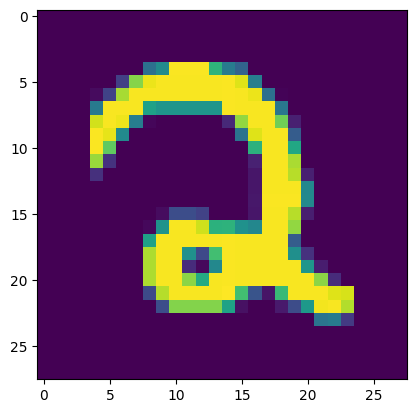

In [15]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[1313,1:].values.reshape(28,28))

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(7794, 784)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

2.0347819328308105


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.944073884043099

# PCA PROCESS


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=70)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf.shape

(7794, 70)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.9338122113904567

In [ ]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred))
    if accuracy_score(y_test,y_pred) > 0.93:
      break

0.2560287326834274
0.3350436121087737
0.5135967162647511
0.6434068753206773
0.7142124166239097
0.8040020523345305
0.8311954848640328
0.8589020010261673
0.8563365828630066
0.8778860954335557
0.8871216008209338
0.8896870189840944
0.909697280656747
0.9122626988199076
0.913801949717804
0.9179066187788609
0.9194458696767573
0.9194458696767573
0.9230374551051821
0.9220112878399179
0.926629040533607
0.9302206259620318


In [ ]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [ ]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
pca = PCA(n_components=100)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
# Eigen Values
print(pca.explained_variance_)
# Eigen Vectors
print(pca.components_)
print(pca.explained_variance_ratio_)

[40.67821734 29.00667149 27.19591836 20.89069335 17.80334202 16.04895682
 13.67125391 12.58165111 11.19914432  9.88607427  9.56949625  8.82217256
  8.15522081  8.09359109  7.52279938  7.25691302  6.73479042  6.67338838
  6.46453414  6.26445572  6.15987612  5.79789099  5.60519498  5.48891968
  5.26578231  5.05826489  4.9874641   4.80602095  4.68228888  4.54537196
  4.51493142  4.43614669  4.29994935  4.22577188  4.08258546  3.99750862
  3.94227138  3.80686312  3.71462173  3.66287595  3.64804304  3.60280694
  3.56114035  3.45458708  3.41398773  3.28428241  3.25634959  3.23217513
  3.18266843  3.06020363  3.0518414   3.0120509   2.9329166   2.9239343
  2.81494302  2.7889651   2.76038328  2.71283457  2.69356204  2.64507026
  2.56808004  2.51879995  2.47271285  2.45044776  2.43527582  2.40490029
  2.36694652  2.34151755  2.3307547   2.24662752  2.23605151  2.23124416
  2.19767325  2.15084912  2.1341248   2.09297908  2.07829455  2.04187961
  2.03838886  1.99047013  1.97289942  1.96043157  1.

In [ ]:
pca = PCA(n_components=300)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.06034569, 0.10337678, 0.14372163, 0.17471274, 0.20112381,
       0.22493226, 0.24521342, 0.26387816, 0.28049197, 0.29515786,
       0.3093541 , 0.3224417 , 0.33453988, 0.34654664, 0.35770664,
       0.36847219, 0.3784632 , 0.38836311, 0.39795319, 0.40724645,
       0.41638459, 0.42498572, 0.43330098, 0.44144377, 0.44925552,
       0.45675945, 0.46415833, 0.47128814, 0.47823431, 0.48497752,
       0.49167549, 0.49825657, 0.50463579, 0.51090498, 0.51696188,
       0.52289251, 0.52874156, 0.5343894 , 0.53990045, 0.54533529,
       0.55074806, 0.55609348, 0.56137675, 0.56650293, 0.57156805,
       0.57644157, 0.58127342, 0.58606921, 0.59079287, 0.59533974,
       0.59986859, 0.60433923, 0.60869205, 0.6130325 , 0.61722175,
       0.62136294, 0.62546255, 0.62949127, 0.63349187, 0.63742288,
       0.6412394 , 0.64498358, 0.64866609, 0.65231075, 0.6559301 ,
       0.65950726, 0.6630263 , 0.6665154 , 0.6699888 , 0.67334549,
       0.67669705, 0.68001947, 0.68329457, 0.68652052, 0.68970

In [ ]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

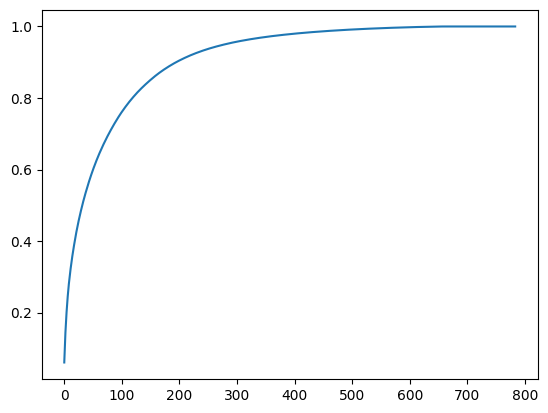

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))